In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
from pymining import itemmining
import sys
sys.path.append('C:\\Users\\10539\\Desktop\\Datathon')
color_set = ['#0c4e8c','#0c81e4','#11c4d4','#4fe7af','#ccf1cd',\
           '#F9F3D1','#D4E537','#B3BE1A','#989400','#2C2B19',\
           '#3A0E21','#EA0D62','#FD7B6E','#FDAD67','#FDDA64']

c:\Users\10539\.conda\envs\pytorch1.9\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\10539\AppData\Local\Temp/ipykernel_16832/656295441.py:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readth

## 结果和成因

In [2]:
Data_general = pd.read_csv('../APAC_2023_Datasets/Crashes/crash_info_general.csv')

C:\Users\10539\AppData\Local\Temp/ipykernel_16832/155282276.py:1: DtypeWarning: Columns (97,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  Data_general = pd.read_csv('../APAC_2023_Datasets/Crashes/crash_info_general.csv')


MAX_SEVERITY_LEVEL Injury severity level of the crash
0 – Property Damage Only
1 – Fatal
2 – Suspected Serious Injury
3 – Suspected Minor Injury
4 – Possible Injury
8 – Injury – Unknown Severity
9 – Unknown if Injured

In [3]:
results = Data_general['MAX_SEVERITY_LEVEL']
labels=['Property Damage Only','Fatal','Suspected Serious Injury','Suspected Minor Injury',\
        'Possible Injury','Injury Unknown Severity','Unknown']
numlable =[0, 1, 2, 3, 4, 8, 9]

In [6]:
dict_lable = dict(zip(numlable, labels))

In [7]:
results = results.apply(lambda x:dict_lable[x])

In [9]:
results.value_counts()

Possible Injury             39091
Property Damage Only        31151
Injury Unknown Severity     30006
Suspected Minor Injury      21827
Unknown                      6365
Suspected Serious Injury     3399
Fatal                        1174
Name: MAX_SEVERITY_LEVEL, dtype: int64

In [5]:
results_counts=results.value_counts()/len(results)

In [9]:
import plotly as py
import plotly.graph_objs as go
pyplt = py.offline.plot
colors = color_set[:7]
trace = [go.Pie(
    labels = results_counts.index,
    values = results_counts.values,
    #rotation = 30,
    #opacity = 2,
    showlegend = True,
    pull = [0,0,0,0,0,0,0],
    #hoverinfo = 'label+percent',
    #textinfo = 'percent',
    #textfont = dict(size=30,color='white'),
    #title = 'Crash Severity',
    marker = dict(colors=colors)
)]

fig = go.Figure(data = trace)
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.show()


In [3]:
Data_flag = pd.read_csv('../APAC_2023_Datasets/Crashes/crash_info_flag_variables.csv')

In [11]:
causes = Data_flag[['AGGRESSIVE_DRIVING','ALCOHOL_RELATED',\
                   'CELL_PHONE','CROSS_MEDIAN','CURVE_DVR_ERROR','DISTRACTED',\
                    'DRINKING_DRIVER','DRUG_RELATED','DRUGGED_DRIVER','FATIGUE_ASLEEP',\
                    'FIRE_IN_VEHICLE','IMPAIRED_DRIVER','SPEEDING_RELATED','SPEEDING',\
                    'TAILGATING','UNDERAGE_DRNK_DRV','UNLICENSED','UNSIGNALIZED_INT','VEHICLE_FAILURE']]

In [12]:
causes['ALCOHOL_OTHERS'] = causes['ALCOHOL_RELATED'] - causes['DRINKING_DRIVER']
del causes['ALCOHOL_RELATED']
causes['ALCOHOL_OTHERS'] = causes['ALCOHOL_OTHERS'].apply(lambda x: 0 if x<=0 else 1)

C:\Users\10539\AppData\Local\Temp/ipykernel_2480/907688339.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\10539\AppData\Local\Temp/ipykernel_2480/907688339.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
causes['DRUG_OTHERS'] = causes['DRUG_RELATED'] - causes['DRUGGED_DRIVER']
del causes['DRUG_RELATED']
causes['DRUG_OTHERS'] = causes['DRUG_OTHERS'].apply(lambda x: 0 if x<=0 else 1)

C:\Users\10539\AppData\Local\Temp/ipykernel_2480/2978393959.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\10539\AppData\Local\Temp/ipykernel_2480/2978393959.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
causes['SPEEDING_OTHERS'] = causes['SPEEDING_RELATED'] - causes['SPEEDING']
del causes['SPEEDING_RELATED']
causes['SPEEDING_OTHERS'] = causes['SPEEDING_OTHERS'].apply(lambda x: 0 if x<=0 else 1)

C:\Users\10539\AppData\Local\Temp/ipykernel_2480/3690839605.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\10539\AppData\Local\Temp/ipykernel_2480/3690839605.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
causes_counts = causes.sum()

In [16]:
causes_counts/len(causes)

AGGRESSIVE_DRIVING    0.491147
CELL_PHONE            0.006248
CROSS_MEDIAN          0.014074
CURVE_DVR_ERROR       0.010443
DISTRACTED            0.056829
DRINKING_DRIVER       0.046507
DRUGGED_DRIVER        0.025802
FATIGUE_ASLEEP        0.011397
FIRE_IN_VEHICLE       0.001895
IMPAIRED_DRIVER       0.062550
SPEEDING              0.032087
TAILGATING            0.047462
UNDERAGE_DRNK_DRV     0.001571
UNLICENSED            0.011307
UNSIGNALIZED_INT      0.193575
VEHICLE_FAILURE       0.041635
ALCOHOL_OTHERS        0.005022
DRUG_OTHERS           0.001737
SPEEDING_OTHERS       0.127672
dtype: float64

In [23]:
temp = (causes_counts.sort_values(ascending=False))

x = temp.index
y = temp.values

layout = go.Layout(
    xaxis = {'title': 'Type'},
    yaxis = {'title': 'Number'},
    legend = {'orientation': 'h', 'x': 0, 'y': 1.075},
    width = 1500,
    height = 600,) 
    
fig = go.Figure(
    layout=layout,
    data=[
        go.Bar(
            x = x, 
            y = y, 
            #name = 'Original Data',
            marker={'color': color_set[1]}
        ),])
    

fig.show()

In [24]:
causes_counts

AGGRESSIVE_DRIVING    65329
CELL_PHONE              831
CROSS_MEDIAN           1872
CURVE_DVR_ERROR        1389
DISTRACTED             7559
DRINKING_DRIVER        6186
DRUGGED_DRIVER         3432
FATIGUE_ASLEEP         1516
FIRE_IN_VEHICLE         252
IMPAIRED_DRIVER        8320
SPEEDING               4268
TAILGATING             6313
UNDERAGE_DRNK_DRV       209
UNLICENSED             1504
UNSIGNALIZED_INT      25748
VEHICLE_FAILURE        5538
ALCOHOL_OTHERS          668
DRUG_OTHERS             231
SPEEDING_OTHERS       16982
dtype: int64

In [25]:
Causes = causes.copy(deep=True)
Causes = causes.astype('bool')

In [26]:
reasons = causes_counts.index
Sample = Causes.apply(lambda x: reasons[x],axis=1)

In [27]:
Sample = Sample.values
Sample = [tuple(x) for x in Sample]

In [28]:
from pymining import itemmining
transactions = Sample
relim_input = itemmining.get_relim_input(transactions)
report = itemmining.relim(relim_input, min_support=5000)

# 对原因进行分层次分析
- 首先对于大于5000 min_support的
- 发现aggressive driver 容易发生追尾和加速，容易在没有交通信号灯的地方出车祸（一般是aggressive）

In [29]:
report

{frozenset({'VEHICLE_FAILURE'}): 5538,
 frozenset({'DRINKING_DRIVER'}): 6186,
 frozenset({'DRINKING_DRIVER', 'IMPAIRED_DRIVER'}): 6186,
 frozenset({'TAILGATING'}): 6313,
 frozenset({'AGGRESSIVE_DRIVING', 'TAILGATING'}): 6313,
 frozenset({'DISTRACTED'}): 7559,
 frozenset({'IMPAIRED_DRIVER'}): 8320,
 frozenset({'SPEEDING_OTHERS'}): 16982,
 frozenset({'AGGRESSIVE_DRIVING', 'SPEEDING_OTHERS'}): 15845,
 frozenset({'UNSIGNALIZED_INT'}): 25748,
 frozenset({'AGGRESSIVE_DRIVING', 'UNSIGNALIZED_INT'}): 13879,
 frozenset({'AGGRESSIVE_DRIVING'}): 65329}

In [31]:
reasons2 = causes_counts.index
reasons2 = reasons2.drop('IMPAIRED_DRIVER')
Causes2 = Causes.copy(deep=True)
del Causes2['IMPAIRED_DRIVER']

Sample2 = Causes2.apply(lambda x: reasons2[x],axis=1)
Sample2 = Sample2.values
Sample2 = [tuple(x) for x in Sample2]

In [32]:
relim_input = itemmining.get_relim_input(Sample2)
report = itemmining.relim(relim_input, min_support=1000)
report

{frozenset({'CURVE_DVR_ERROR'}): 1389,
 frozenset({'UNLICENSED'}): 1504,
 frozenset({'FATIGUE_ASLEEP'}): 1516,
 frozenset({'CROSS_MEDIAN'}): 1872,
 frozenset({'DRUGGED_DRIVER'}): 3432,
 frozenset({'DRINKING_DRIVER', 'DRUGGED_DRIVER'}): 1298,
 frozenset({'AGGRESSIVE_DRIVING', 'DRUGGED_DRIVER'}): 1235,
 frozenset({'SPEEDING'}): 4268,
 frozenset({'AGGRESSIVE_DRIVING', 'SPEEDING'}): 4268,
 frozenset({'VEHICLE_FAILURE'}): 5538,
 frozenset({'AGGRESSIVE_DRIVING', 'VEHICLE_FAILURE'}): 2219,
 frozenset({'DRINKING_DRIVER'}): 6186,
 frozenset({'AGGRESSIVE_DRIVING', 'DRINKING_DRIVER'}): 2371,
 frozenset({'TAILGATING'}): 6313,
 frozenset({'AGGRESSIVE_DRIVING', 'TAILGATING'}): 6313,
 frozenset({'DISTRACTED'}): 7559,
 frozenset({'DISTRACTED', 'UNSIGNALIZED_INT'}): 1113,
 frozenset({'AGGRESSIVE_DRIVING', 'DISTRACTED'}): 1776,
 frozenset({'SPEEDING_OTHERS'}): 16982,
 frozenset({'SPEEDING_OTHERS', 'UNSIGNALIZED_INT'}): 1812,
 frozenset({'AGGRESSIVE_DRIVING',
            'SPEEDING_OTHERS',
            'U

In [61]:
relim_input = itemmining.get_relim_input(Sample2)
report = itemmining.relim(relim_input, min_support=500)
report

{frozenset({'ALCOHOL_OTHERS'}): 668,
 frozenset({'CELL_PHONE'}): 831,
 frozenset({'CELL_PHONE', 'DISTRACTED'}): 831,
 frozenset({'CURVE_DVR_ERROR'}): 1389,
 frozenset({'AGGRESSIVE_DRIVING', 'CURVE_DVR_ERROR'}): 516,
 frozenset({'UNLICENSED'}): 1504,
 frozenset({'AGGRESSIVE_DRIVING', 'UNLICENSED'}): 785,
 frozenset({'FATIGUE_ASLEEP'}): 1516,
 frozenset({'CROSS_MEDIAN'}): 1872,
 frozenset({'DRUGGED_DRIVER'}): 3432,
 frozenset({'DRINKING_DRIVER', 'DRUGGED_DRIVER'}): 1298,
 frozenset({'AGGRESSIVE_DRIVING', 'DRUGGED_DRIVER'}): 1235,
 frozenset({'SPEEDING'}): 4268,
 frozenset({'DRINKING_DRIVER', 'SPEEDING'}): 558,
 frozenset({'AGGRESSIVE_DRIVING', 'DRINKING_DRIVER', 'SPEEDING'}): 558,
 frozenset({'SPEEDING', 'UNSIGNALIZED_INT'}): 756,
 frozenset({'AGGRESSIVE_DRIVING', 'SPEEDING', 'UNSIGNALIZED_INT'}): 756,
 frozenset({'AGGRESSIVE_DRIVING', 'SPEEDING'}): 4268,
 frozenset({'VEHICLE_FAILURE'}): 5538,
 frozenset({'SPEEDING_OTHERS', 'VEHICLE_FAILURE'}): 768,
 frozenset({'AGGRESSIVE_DRIVING', 'SPE

In [63]:
reasons3 = causes_counts.index
reasons3 = reasons3.drop('IMPAIRED_DRIVER')
reasons3 = reasons3.drop('AGGRESSIVE_DRIVING')
Causes3 = Causes.copy(deep=True)
del Causes3['IMPAIRED_DRIVER']
del Causes3['AGGRESSIVE_DRIVING']

Sample3 = Causes3.apply(lambda x: reasons3[x],axis=1)
Sample3 = Sample3.values
Sample3 = [tuple(x) for x in Sample3]

In [64]:
relim_input = itemmining.get_relim_input(Sample3)
report = itemmining.relim(relim_input, min_support=500)
report

{frozenset({'ALCOHOL_OTHERS'}): 668,
 frozenset({'CELL_PHONE'}): 831,
 frozenset({'CELL_PHONE', 'DISTRACTED'}): 831,
 frozenset({'CURVE_DVR_ERROR'}): 1389,
 frozenset({'UNLICENSED'}): 1504,
 frozenset({'FATIGUE_ASLEEP'}): 1516,
 frozenset({'CROSS_MEDIAN'}): 1872,
 frozenset({'DRUGGED_DRIVER'}): 3432,
 frozenset({'DRINKING_DRIVER', 'DRUGGED_DRIVER'}): 1298,
 frozenset({'SPEEDING'}): 4268,
 frozenset({'DRINKING_DRIVER', 'SPEEDING'}): 558,
 frozenset({'SPEEDING', 'UNSIGNALIZED_INT'}): 756,
 frozenset({'VEHICLE_FAILURE'}): 5538,
 frozenset({'SPEEDING_OTHERS', 'VEHICLE_FAILURE'}): 768,
 frozenset({'UNSIGNALIZED_INT', 'VEHICLE_FAILURE'}): 928,
 frozenset({'DRINKING_DRIVER'}): 6186,
 frozenset({'DRINKING_DRIVER', 'SPEEDING_OTHERS'}): 788,
 frozenset({'DRINKING_DRIVER', 'UNSIGNALIZED_INT'}): 806,
 frozenset({'TAILGATING'}): 6313,
 frozenset({'SPEEDING_OTHERS', 'TAILGATING'}): 569,
 frozenset({'TAILGATING', 'UNSIGNALIZED_INT'}): 650,
 frozenset({'DISTRACTED'}): 7559,
 frozenset({'DISTRACTED', '

### Fatal和重伤的

In [45]:
Fatal = Data_general[(Data_general['MAX_SEVERITY_LEVEL']).isin([1,2])]
Fatal = Fatal.CRN.values

In [46]:
Fatal_index = Data_flag[(Data_flag['CRN']).isin(Fatal)].index

In [47]:
Causes4 = Causes.copy(deep=True)
Causes4 = Causes4.loc[Fatal_index]
del Causes4['IMPAIRED_DRIVER']
del Causes4['AGGRESSIVE_DRIVING']

reasons4 = causes_counts.index
reasons4 = reasons4.drop('IMPAIRED_DRIVER')
reasons4 = reasons4.drop('AGGRESSIVE_DRIVING')


Sample4 = Causes4.apply(lambda x: reasons4[x],axis=1)
Sample4 = Sample4.values
Sample4 = [tuple(x) for x in Sample4]

In [10]:
731/1174

0.6226575809199318

In [49]:
relim_input = itemmining.get_relim_input(Sample4)
report = itemmining.relim(relim_input, min_support=100)
report

{frozenset({'ALCOHOL_OTHERS'}): 122,
 frozenset({'CROSS_MEDIAN'}): 141,
 frozenset({'VEHICLE_FAILURE'}): 149,
 frozenset({'DISTRACTED'}): 157,
 frozenset({'DRUGGED_DRIVER'}): 219,
 frozenset({'DRINKING_DRIVER'}): 454,
 frozenset({'DRINKING_DRIVER', 'SPEEDING'}): 108,
 frozenset({'SPEEDING'}): 462,
 frozenset({'SPEEDING_OTHERS'}): 462,
 frozenset({'UNSIGNALIZED_INT'}): 761}

## 喝酒嗑药致死的回归
- Y fatal
- X 喝酒嗑药和交叉项 （控制 年龄 成熟 地区 天气 signal）

In [15]:
Data_general.ROAD_CONDITION

0         1
1         9
2         1
3         1
4         9
         ..
133008    1
133009    1
133010    1
133011    1
133012    1
Name: ROAD_CONDITION, Length: 133013, dtype: int64

In [ ]:
Data_flag.DRIVER_50_64YR
Data_flag.DRIVER_65_74YR
Data_flag.DRIVER_75PLUS


In [55]:
Data_flag.MATURE_DRIVER

0         0
1         0
2         0
3         0
4         0
         ..
133008    0
133009    0
133010    0
133011    0
133012    0
Name: MATURE_DRIVER, Length: 133013, dtype: int64

In [54]:
Data_flag.DRIVER_16YR
Data_flag.DRIVER_17YR
Data_flag.DRIVER_18YR
Data_flag.DRIVER_19YR
Data_flag.DRIVER_20YR
Data_flag.MATURE_DRIVER
Data_flag.UNSIGNALIZED_INT

0         0
1         0
2         0
3         0
4         0
         ..
133008    0
133009    0
133010    0
133011    0
133012    0
Name: DRIVER_16YR, Length: 133013, dtype: int64

In [56]:
Data_flag.UNSIGNALIZED_INT

0         0
1         0
2         0
3         0
4         1
         ..
133008    0
133009    0
133010    0
133011    0
133012    1
Name: UNSIGNALIZED_INT, Length: 133013, dtype: int64

In [16]:
regdata_flag = Data_flag[['CRN','DRIVER_16YR','DRIVER_17YR','DRIVER_18YR','DRIVER_19YR',\
                          'DRIVER_20YR','DRIVER_50_64YR','DRIVER_65_74YR',\
                            'DRIVER_75PLUS','MATURE_DRIVER','UNSIGNALIZED_INT',\
                            'DRINKING_DRIVER','DRUGGED_DRIVER','ALCOHOL_RELATED','DRUG_RELATED',\
                              'MOTORCYCLE','SPEEDING']]

In [17]:
Data_general.columns.values
regdata = Data_general[['CRN','fips','ROAD_CONDITION','MAX_SEVERITY_LEVEL']]

In [18]:
Data_flag.DRINKING_DRIVER.value_counts()

0    126827
1      6186
Name: DRINKING_DRIVER, dtype: int64

In [19]:
Data_flag.ALCOHOL_RELATED.value_counts()

0    126159
1      6854
Name: ALCOHOL_RELATED, dtype: int64

In [20]:
Data_flag.MOTORCYCLE.value_counts()

0    129482
1      3531
Name: MOTORCYCLE, dtype: int64

In [21]:
xy = pd.merge(regdata,regdata_flag,on='CRN',how='inner')

In [22]:
xy.shape

(133013, 20)

In [23]:
def age_func(x):
    if x.DRIVER_16YR == 1:
        age = 16 
    elif x.DRIVER_17YR==1:
        age = 17
    elif x.DRIVER_18YR==1:
        age = 18
    elif x.DRIVER_19YR==1:
        age = 19
    elif x.DRIVER_20YR==1:
        age = 20
    elif x.DRIVER_50_64YR==1:
        age = 57
    elif x.DRIVER_65_74YR==1:
        age = 70
    elif x.DRIVER_75PLUS==1:
        age = 75
    else:
        age = 35
    return age
    

In [24]:
xy['age'] = xy.apply(lambda x:age_func(x),axis=1)

In [25]:
xy['fatal'] = xy['MAX_SEVERITY_LEVEL'].apply(lambda x: 1 if x==1 else 0)

In [26]:
xy['mature driver'] = xy['MATURE_DRIVER'].apply(lambda x: 1 if x==1 else 0)

In [27]:
xy['unsignal'] = xy['UNSIGNALIZED_INT'].apply(lambda x: 1 if x==1 else 0)

In [28]:
xy['drinking driver'] = xy['DRINKING_DRIVER'].apply(lambda x: 1 if x==1 else 0)

In [29]:
xy['drinking others'] = xy['ALCOHOL_RELATED'] - xy['DRINKING_DRIVER']
xy['drinking others'] = xy['drinking others'].apply(lambda x: 1 if x==1 else 0)

In [30]:
xy['drugged driver'] = xy['DRUGGED_DRIVER'].apply(lambda x: 1 if x==1 else 0)

In [31]:
xy['drug others'] = xy['DRUG_RELATED'] - xy['DRUGGED_DRIVER']
xy['drug others'] = xy['drug others'].apply(lambda x: 1 if x==1 else 0)

In [32]:
xy['motorcycle'] = xy['MOTORCYCLE'].apply(lambda x: 1 if x==1 else 0)
xy['speeding'] = xy['SPEEDING'].apply(lambda x: 1 if x==1 else 0)

In [33]:
y = xy['fatal']
#X = xy[['age','mature driver','unsignal','ROAD_CONDITION','fips','drinking driver','drinking others','drug others','drugged driver']]
X = xy[['age','mature driver','unsignal','drinking driver','drinking others','drug others','drugged driver','motorcycle','speeding']]

In [146]:
# X = pd.get_dummies(X,columns=['ROAD_CONDITION','fips'])
#X = pd.get_dummies(X,columns=['ROAD_CONDITION'])

In [166]:
#X['interact'] = X['drinking driver']*X['drugged driver']

C:\Users\10539\AppData\Local\Temp/ipykernel_2480/3814756771.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
import statsmodels.api as sm
X['intercept'] = 1.0
logit = sm.Logit(y, X)
result = logit.fit()

C:\Users\10539\AppData\Local\Temp/ipykernel_19804/3944002457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1.0


Optimization terminated successfully.
         Current function value: 0.044721
         Iterations 9


In [35]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  fatal   No. Observations:               133013
Model:                          Logit   Df Residuals:                   133003
Method:                           MLE   Df Model:                            9
Date:                Sat, 15 Apr 2023   Pseudo R-squ.:                  0.1150
Time:                        20:23:34   Log-Likelihood:                -5948.5
converged:                       True   LL-Null:                       -6721.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
age                 0.0055      0.003      2.073      0.038       0.000       0.011
mature driver       0.1058      0.123      0.864      0.388      -0.134       0.346
unsignal           -0.4135      0.087     -4.744      0.000      -0.584      -0.243
drinking driver     1.5133      0.087     17.450      0.000       1.343       1.683
drinking others     3.1816      0.135     23.566      0.000       2.917       3.446
drug others         0.8464      0.276      3.063      0.002       0.305       1.388
drugged driver      0.3417      0.131      2.616      0.009       0.086       0.598
motorcycle          2.3398      0.080     29.322      0.000       2.183       2.496
speeding            1.5514      0.085     18.360      0.000       1.386       1.717
intercept          -5.4810      0.114    -48.193      0.000      -5.704      -5.258
===================================================================================
"""

### 创死路人

In [4]:
regdata_flag = Data_flag[['CRN','DRIVER_16YR','DRIVER_17YR','DRIVER_18YR','DRIVER_19YR',\
                          'DRIVER_20YR','DRIVER_50_64YR','DRIVER_65_74YR',\
                            'DRIVER_75PLUS','MATURE_DRIVER','UNSIGNALIZED_INT',\
                            'DRINKING_DRIVER','DRUGGED_DRIVER','ALCOHOL_RELATED','DRUG_RELATED',\
                              'MOTORCYCLE','SPEEDING']]

In [5]:
Data_general.columns.values
regdata = Data_general[['CRN','fips','ROAD_CONDITION','MAX_SEVERITY_LEVEL','COLLISION_TYPE']]

In [6]:
xy = pd.merge(regdata,regdata_flag,on='CRN',how='inner')

In [201]:
xy['fatal'] = xy['MAX_SEVERITY_LEVEL'].apply(lambda x: 1 if (x in [1,2]) else 0)

In [202]:
xy['pedestrian'] = xy['COLLISION_TYPE'].apply(lambda x: 1 if x==8 else 0)

In [203]:
xy['drinking others'] = xy['ALCOHOL_RELATED'] - xy['DRINKING_DRIVER']
xy['drinking others'] = xy['drinking others'].apply(lambda x: 1 if x==1 else 0)

xy['drug others'] = xy['DRUG_RELATED'] - xy['DRUGGED_DRIVER']
xy['drug others'] = xy['drug others'].apply(lambda x: 1 if x==1 else 0)


In [204]:
sample = xy[['fatal','pedestrian','drinking others','drug others']]

In [205]:
sample.sum()

fatal               4573
pedestrian         17997
drinking others      668
drug others          231
dtype: int64

In [206]:
samplee = sample.astype('bool')
items= samplee.columns.values
sample4 = samplee.apply(lambda x: items[x],axis=1)
sample4 = sample4.values

In [207]:
sample4 = [tuple(x) for x in sample4]
relim_input = itemmining.get_relim_input(sample4)
report = itemmining.relim(relim_input, min_support=100)
report

{frozenset({'drug others'}): 231,
 frozenset({'drug others', 'pedestrian'}): 181,
 frozenset({'drinking others'}): 668,
 frozenset({'drinking others', 'fatal'}): 122,
 frozenset({'drinking others', 'fatal', 'pedestrian'}): 113,
 frozenset({'drinking others', 'pedestrian'}): 565,
 frozenset({'fatal'}): 4573,
 frozenset({'fatal', 'pedestrian'}): 1388,
 frozenset({'pedestrian'}): 17997}

## unsignalized的地理位置观察

In [4]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.cluster import KMeans

In [5]:
regdata_flag = Data_flag[['CRN','DRIVER_16YR','DRIVER_17YR','DRIVER_18YR','DRIVER_19YR',\
                          'DRIVER_20YR','DRIVER_50_64YR','DRIVER_65_74YR',\
                            'DRIVER_75PLUS','MATURE_DRIVER','UNSIGNALIZED_INT',\
                            'DRINKING_DRIVER','DRUGGED_DRIVER','ALCOHOL_RELATED','DRUG_RELATED',\
                              'MOTORCYCLE','SPEEDING']]
regdata = Data_general[['CRN','LONGITUDE','LATITUDE','fips','ROAD_CONDITION','MAX_SEVERITY_LEVEL','COLLISION_TYPE','CRASH_YEAR']]

In [6]:
xy = pd.merge(regdata,regdata_flag,on='CRN',how='inner')

In [7]:
xy = xy[xy['UNSIGNALIZED_INT']==1]

In [8]:
def convert_to_lat(lat_str):
    lat_parts = lat_str.split(':')
    lat_deg, lat_min = lat_parts[0].split(' ')
    lat_sec = float(lat_parts[1])
    lat_deg = float(lat_deg)
    lat_min = float(lat_min)
    lat_decimal = lat_deg + (lat_min / 60.0) + (lat_sec / 3600.0)
    return lat_decimal if lat_deg >= 0 else -lat_decimal

def convert_to_long(long_str):
    long_parts = long_str.split(':')
    long_deg, long_min = long_parts[0].split(' ')
    long_sec = -float(long_parts[1])
    long_deg = -float(long_deg)
    long_min = -float(long_min)
    lat_decimal = long_deg + (long_min / 60.0) + (long_sec / 3600.0)
    return lat_decimal

In [9]:
xy = xy[xy['LATITUDE'].notna() & xy['LONGITUDE'].notna()]
xy['LONGITUDE'] = xy['LONGITUDE'].apply(lambda x: convert_to_long(x))
xy['LATITUDE'] = xy['LATITUDE'].apply(lambda x: convert_to_lat(x))

In [10]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import pymc3 as pm
import contextily as ctx

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [11]:
figdata = xy['fips'].value_counts()

In [12]:
temp = figdata.index.values 
figdata.index=[str(int(x)) for x in temp]

In [93]:
#figdata.index = figdata.index.append(lambda x:str(int(x)))

In [13]:
figdata = figdata.to_frame(name='count')

In [14]:
figdata

,count
421019800001,846
421019809001,479
421010366001,222
421019807001,207
421010369002,178
...,...
421010012022,1
420454023001,1
421010257003,1
421010007001,1


In [15]:
census = gpd.read_file('../Citadel-Datathon-yitao/Data/Census_Block_Groups_2010-shp/Census_Block_Groups_2010.shp')
census = pd.merge(census, figdata, left_on='GEOID10', right_index=True, how='inner')

In [16]:
census

,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,Shape__Are,Shape__Len,geometry,count
0,1,42,101,010800,1,421010108001,Block Group 1,G5030,S,161887,0,+39.9687580,-075.1997251,1.742508e+06,8200.327170,"POLYGON ((-75.19851 39.96945, -75.19744 39.969...",17
1,2,42,101,010800,2,421010108002,Block Group 2,G5030,S,103778,0,+39.9665475,-075.2004455,1.117026e+06,4364.980144,"POLYGON ((-75.19783 39.96571, -75.20006 39.965...",24
2,3,42,101,010900,2,421010109002,Block Group 2,G5030,S,43724,0,+39.9642929,-075.1896435,4.706347e+05,3048.109084,"POLYGON ((-75.18766 39.96450, -75.18755 39.963...",7
3,4,42,101,011000,2,421010110002,Block Group 2,G5030,S,108966,0,+39.9753585,-075.2113476,1.172871e+06,5169.004282,"POLYGON ((-75.20984 39.97351, -75.21221 39.973...",11
4,5,42,101,011000,1,421010110001,Block Group 1,G5030,S,142244,0,+39.9724202,-075.2051689,1.531076e+06,10476.574129,"POLYGON ((-75.19855 39.97330, -75.19854 39.973...",16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,1332,42,101,016200,2,421010162002,Block Group 2,G5030,S,223441,0,+39.9843381,-075.1407049,2.405057e+06,6772.642577,"POLYGON ((-75.14350 39.98628, -75.14284 39.986...",23
1332,1333,42,101,015600,2,421010156002,Block Group 2,G5030,S,177448,0,+39.9806576,-075.1425322,1.909996e+06,6128.309258,"POLYGON ((-75.14102 39.97963, -75.14135 39.978...",10
1333,1334,42,101,015700,3,421010157003,Block Group 3,G5030,S,305254,0,+39.9768522,-075.1353407,3.285646e+06,9381.401996,"POLYGON ((-75.13818 39.97925, -75.13808 39.979...",35
1334,1335,42,101,017900,5,421010179005,Block Group 5,G5030,S,275799,0,+39.9858493,-075.1177472,2.968631e+06,9625.938356,"POLYGON ((-75.11561 39.98356, -75.11604 39.982...",17


C:\Users\10539\AppData\Local\Temp/ipykernel_16832/1178826643.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  unsig_count = gpd.sjoin(census,xy, predicate='contains').groupby(level=0).size().reset_index(name='count')


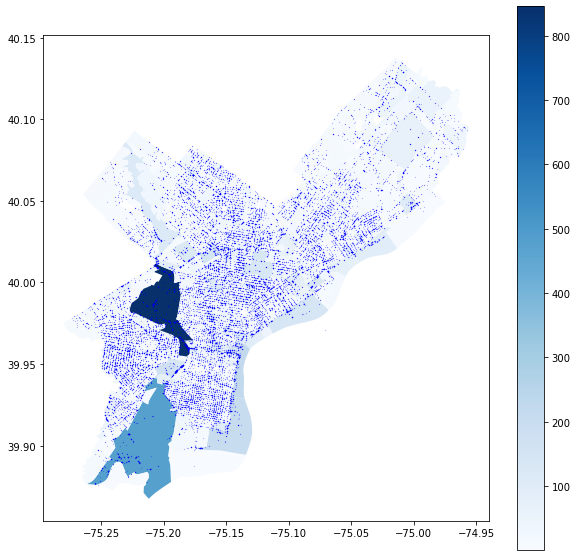

In [17]:
#census = gpd.read_file('../Citadel-Datathon-yitao/Data/Census_Tracts_2010-shp/c16590ca-5adf-4332-aaec-9323b2fa7e7d2020328-1-1jurugw.pr6w.shp')
xy = gpd.GeoDataFrame(xy, geometry=gpd.points_from_xy(xy.LONGITUDE, xy.LATITUDE))
unsig_count = gpd.sjoin(census,xy, predicate='contains').groupby(level=0).size().reset_index(name='count')
'''
.groupby(level=0).size().reset_index(name='count')
unsig_count = unsig_count.set_index('index').reindex(range(len(census))).fillna(0).reset_index()
'''
fig, ax = plt.subplots(figsize=(10,10))
census.plot(column='count', cmap='Blues', legend=True, ax=ax)
plt.scatter(xy['LONGITUDE'],xy['LATITUDE'],s=0.01,c='b')
#ax.set_title('Unsig Count in Philadelphia by Census Tracts')
plt.show()


In [18]:
census['count']

0       17
1       24
2        7
3       11
4       16
        ..
1331    23
1332    10
1333    35
1334    17
1335    20
Name: count, Length: 1319, dtype: int64

In [19]:
unsig_count

,index,count
0,0,20
1,1,7
2,2,12
3,3,10
4,4,16
...,...,...
1308,1331,26
1309,1332,13
1310,1333,29
1311,1334,20


In [20]:
xy.CRASH_YEAR.value_counts()

2016    2390
2012    2373
2013    2285
2011    2270
2010    2250
2017    2139
2019    2136
2015    2103
2018    2080
2014    2018
2021    1842
2020    1799
Name: CRASH_YEAR, dtype: int64

In [110]:
loca_year

,LONGITUDE,LATITUDE,CRASH_YEAR
122220,-75.1763,39.9859,2021
122242,-75.0230,40.1130,2021
122263,-75.2373,39.9494,2021
122270,-75.2295,39.9563,2021
122271,-75.2259,39.9552,2021
...,...,...,...
132998,-75.2184,39.9294,2021
133004,-75.1367,39.9949,2021
133005,-75.1722,40.0683,2021
133006,-75.2345,39.9720,2021


In [22]:
locats = xy[['LONGITUDE','LATITUDE']]
locats = locats.round(4)

In [23]:
locat_agg = locats.value_counts().sort_values(ascending=False)

In [24]:
locat_agg

LONGITUDE  LATITUDE
-75.1765   40.0659     74
-75.1415   39.9517     59
-75.0495   40.0189     55
-75.2083   39.9867     55
-75.1509   39.9706     50
                       ..
-75.0835   40.0620      1
-75.0834   40.0619      1
-75.0833   40.0080      1
-75.0848   40.0620      1
-74.9575   40.0931      1
Length: 11256, dtype: int64

In [25]:
locat_agg[locat_agg>=50]

LONGITUDE  LATITUDE
-75.1765   40.0659     74
-75.1415   39.9517     59
-75.0495   40.0189     55
-75.2083   39.9867     55
-75.1509   39.9706     50
dtype: int64

In [26]:
sig_loc = locat_agg[locat_agg>=10]

In [27]:
loca_year = xy[['LONGITUDE','LATITUDE','CRASH_YEAR']]
loca_year = loca_year[loca_year.CRASH_YEAR==2021]
loca_year = loca_year.round(4)  

In [28]:
locat_agg21 = loca_year.value_counts().sort_values(ascending=False)

In [29]:
locat_agg21

LONGITUDE  LATITUDE  CRASH_YEAR
-75.1812   39.9605   2021          6
-75.1610   39.9762   2021          5
-75.1509   39.9706   2021          5
-75.0495   40.0189   2021          5
-75.1799   39.9600   2021          4
                                  ..
-75.1003   40.0000   2021          1
-75.0706   40.0756   2021          1
-75.1195   40.0319   2021          1
-75.0700   40.0410   2021          1
-74.9768   40.1029   2021          1
Length: 1543, dtype: int64

In [30]:
sig_loc21 = locat_agg21.index
sig_loc = sig_loc.index

In [31]:
sig_loc21 = [list(x) for x in sig_loc21]
sig_loc21 = np.array(sig_loc21)
sig_loc21 = sig_loc21[:,0:2]

In [32]:
sig_loc = [list(x) for x in sig_loc]
sig_loc = np.array(sig_loc)
sig_loc = sig_loc[:,0:2]

In [33]:
locs = []
for i in sig_loc:
    if i in sig_loc21:
        locs.append(i)

In [36]:
len(locs)

225

In [37]:
locs = np.array(locs)

In [38]:
LOCS = pd.DataFrame(locs,columns=['LONGITUDE','LATITUDE'])
LOCS.to_csv('suggest_signal_location.csv.csv')

C:\Users\10539\AppData\Local\Temp/ipykernel_16832/787109546.py:5: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  unsig_count = gpd.sjoin(census, xy, predicate='contains').groupby(level=0).size().reset_index(name='count')


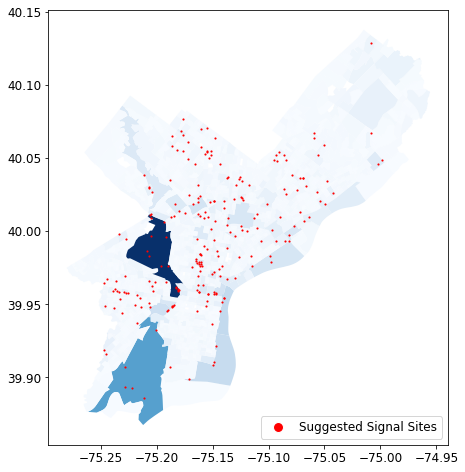

In [100]:
census = gpd.read_file('../Citadel-Datathon-yitao/Data/Census_Block_Groups_2010-shp/Census_Block_Groups_2010.shp')
census = pd.merge(census, figdata, left_on='GEOID10', right_index=True, how='inner')
xy = xy[xy.UNSIGNALIZED_INT==1]
xy = gpd.GeoDataFrame(xy, geometry=gpd.points_from_xy(xy.LONGITUDE, xy.LATITUDE))
unsig_count = gpd.sjoin(census, xy, predicate='contains').groupby(level=0).size().reset_index(name='count')
unsig_count = unsig_count.set_index('index').reindex(range(len(census))).fillna(0).reset_index()

fig, ax = plt.subplots(figsize=(10,8))
legend0 = [plt.Line2D([0], [0], marker='.', color='white', markerfacecolor='red', label='Suggested Signal Sites', markersize=20)]
census.plot(column='count', cmap='Blues', legend=False, ax=ax)
plt.scatter(locs[:,0], locs[:,1],s=5,c='red',marker='.')
plt.legend(legend0, ['Suggested Signal Sites'], loc='lower right', fontsize=12)
plt.xticks(size=12)
plt.yticks(size=12)
#ax.set_title('Unsig Count in Philadelphia by Census Tracts')
plt.savefig('suggested_spots.jpg', dpi=300)
plt.show()

In [95]:
plt.savefig('suggest_spots.png', dpi=300)

<Figure size 432x288 with 0 Axes>

In [96]:
plt.show()

In [120]:
sig_loc21

Int64Index([122220, 122242, 122263, 122270, 122271, 122289, 122322, 122359,
            122360, 122372,
            ...
            132965, 132968, 132993, 132996, 132997, 132998, 133004, 133005,
            133006, 133011],
           dtype='int64', length=1842)

In [60]:
unsig_count

,index,count
0,0,48
1,1,60
2,2,70
3,3,36
4,4,62
...,...,...
379,379,98
380,380,217
381,381,107
382,382,215


In [58]:
crash_counts

,index,counted


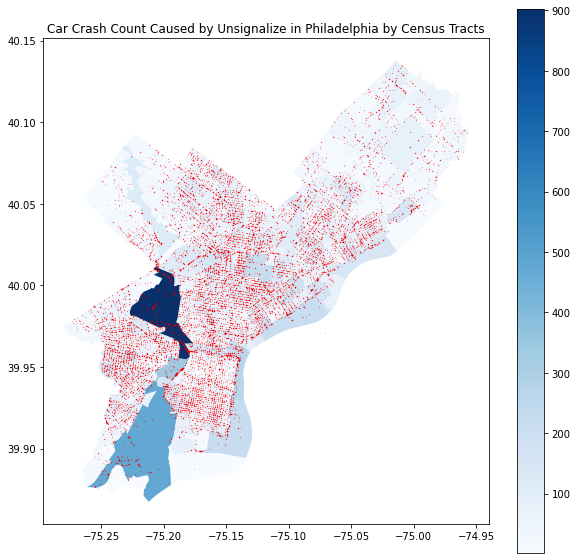

In [54]:
# if census tract does not contain any crash, set the count to 0
#crash_counts = crash_counts.set_index('index').reindex(range(len(census))).fillna(0).reset_index()
fig, ax = plt.subplots(figsize=(10,10))
census.plot(column=crash_counts['counted'], cmap='Blues', legend=True, ax=ax)
ax.set_title('Car Crash Count Caused by Unsignalize in Philadelphia by Census Tracts')

plt.scatter(xy['LONGITUDE'],xy['LATITUDE'],s=0.01,c='red')
plt.show()

In [82]:
census = gpd.read_file('../Citadel-Datathon-yitao/Data/Census_Tracts_2010-shp/c16590ca-5adf-4332-aaec-9323b2fa7e7d2020328-1-1jurugw.pr6w.shp')

crash_general = pd.read_csv('../APAC_2023_Datasets/Crashes/crash_info_general.csv')
crash_general = crash_general[crash_general['LATITUDE'].notna() & crash_general['LONGITUDE'].notna()]
crash_general['LATITUDE'] = crash_general['LATITUDE'].apply(convert_to_lat)
crash_general['LONGITUDE'] = crash_general['LONGITUDE'].apply(convert_to_long)
crash_points = gpd.points_from_xy(crash_general.LONGITUDE, crash_general.LATITUDE)
crash_gdf = gpd.GeoDataFrame(geometry=crash_points)

populations = pd.read_csv('../APAC_2023_Datasets/Traffic, Investigations _ Other/philadelphia_population_metrics.csv')
census['GEOID10'] = census['GEOID10'].apply(lambda x:int(x))
populations = populations.merge(census[['GEOID10', 'geometry']], how='left', left_on='GEOGRAPHY_NAME', right_on='GEOID10')
populations = gpd.GeoDataFrame(populations)


philly_bbox = (-75.2803, 39.8718, -74.9558, 40.1376)

cell_size = 0.01  # in
x_min, y_min, x_max, y_max = philly_bbox
n_cells_x = int((x_max - x_min) / cell_size)
n_cells_y = int((y_max - y_min) / cell_size)
grid_cells = []
for x in range(n_cells_x):
    for y in range(n_cells_y):
        grid_cell = Polygon([(x_min + x * cell_size, y_min + y * cell_size),
                             (x_min + (x+1) * cell_size, y_min + y * cell_size),
                             (x_min + (x+1) * cell_size, y_min + (y+1) * cell_size),
                             (x_min + x * cell_size, y_min + (y+1) * cell_size)])
        grid_cells.append(grid_cell)

grid = gpd.GeoDataFrame({'geometry': grid_cells, 'index': range(len(grid_cells))})
grid.set_crs(epsg=4326, inplace=True)
grid = grid.to_crs(census.crs)
# first we filter out the grids that intersect with census
# 1
census_sindex = census.sindex
intersecting_idx = []
for geometry in grid.geometry:
    possible_matches_index = list(census_sindex.intersection(geometry.bounds))
    possible_matches = census.iloc[possible_matches_index]
    precise_matches = possible_matches[possible_matches.intersects(geometry)]
    if len(precise_matches) > 0:
        intersecting_idx.append(True)
    else:
        intersecting_idx.append(False)
gird_filtered = grid[intersecting_idx]
# 2
census_union = census.geometry.unary_union
intersects_census = grid.geometry.intersects(census_union)
gird_filtered = grid[intersects_census]

grid = gird_filtered.reset_index(drop=True).drop('index', axis=1)

C:\Users\10539\AppData\Local\Temp/ipykernel_23576/2031900939.py:3: DtypeWarning: Columns (97,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  crash_general = pd.read_csv('../APAC_2023_Datasets/Crashes/crash_info_general.csv')


In [85]:
xy = xy[xy.UNSIGNALIZED_INT==1]
xy = gpd.GeoDataFrame(xy, geometry=gpd.points_from_xy(xy.LONGITUDE, xy.LATITUDE)).set_crs(epsg=4326)
xy = xy.to_crs(grid.crs)
census = gpd.read_file('../Citadel-Datathon-yitao/Data/Census_Tracts_2010-shp/c16590ca-5adf-4332-aaec-9323b2fa7e7d2020328-1-1jurugw.pr6w.shp')
investigation_count = gpd.sjoin(xy, grid, how='left', predicate='within').groupby('index_right').size().reset_index(name='count')
investigation_count = investigation_count.set_index('index_right').reindex(range(len(grid))).fillna(0).reset_index()
grid['unsig'] = investigation_count['count']
#grid['unsig'] = grid['unsig'] / grid['investigation'].max()


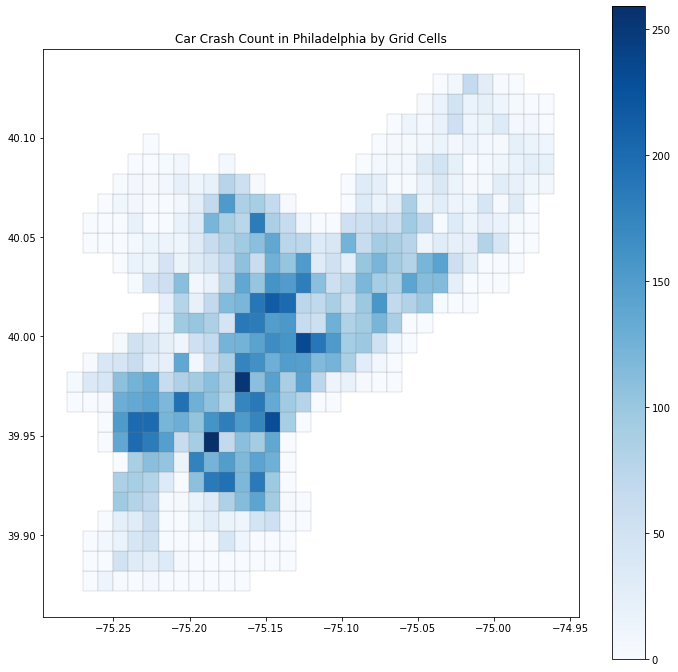

In [86]:
ax = grid.plot(column=grid['unsig'], cmap='Blues', figsize=(12, 12), edgecolor='gray', linewidth=0.2,legend=True)
ax.set_title('Car Crash Count in Philadelphia by Grid Cells')
plt.show()

In [40]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

location =xy[['LATITUDE','LONGITUDE']].values

db = DBSCAN(eps=0.3, min_samples=100).fit(location)

In [43]:
location

array([[ 39.99949417, -75.08460444],
       [ 40.04594306, -75.00180556],
       [ 40.02296056, -75.03604028],
       ...,
       [ 40.06828889, -75.17221389],
       [ 39.97202778, -75.23447472],
       [ 39.99032583, -75.16296972]])

In [44]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

location =xy[['LATITUDE','LONGITUDE']].values

db = DBSCAN(eps=0.01, min_samples=10).fit(location)

In [48]:
yloc = db.fit_predict(location)

In [ ]:
ax = world.plot(
    color='white', edgecolor='black',figsize=(30,30))

# We can now plot our ``GeoDataFrame``.
gdf_.plot(ax=ax, color='red')


In [51]:
np.unique(yloc)

array([-1,  0], dtype=int64)

In [45]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

NameError: name 'X' is not defined

## 饮酒吸毒和Investigation
找到饮酒吸毒的grid


C:\Users\10539\AppData\Local\Temp/ipykernel_20672/2072061806.py:12: DtypeWarning: Columns (97,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  crash_general = pd.read_csv('../APAC_2023_Datasets/Crashes/crash_info_general.csv')
c:\Users\10539\.conda\envs\pytorch1.9\lib\site-packages\IPython\core\interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\10539\AppData\Local\Temp/ipykernel_20672/2072061806.py:21: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  crash_counts = gpd.sjoin(census, crash_gdf, op='contains').groupby(level=0).size().reset_index(name='count')


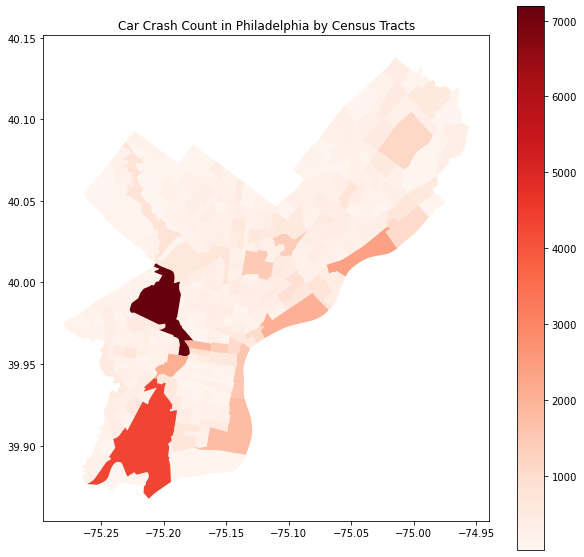

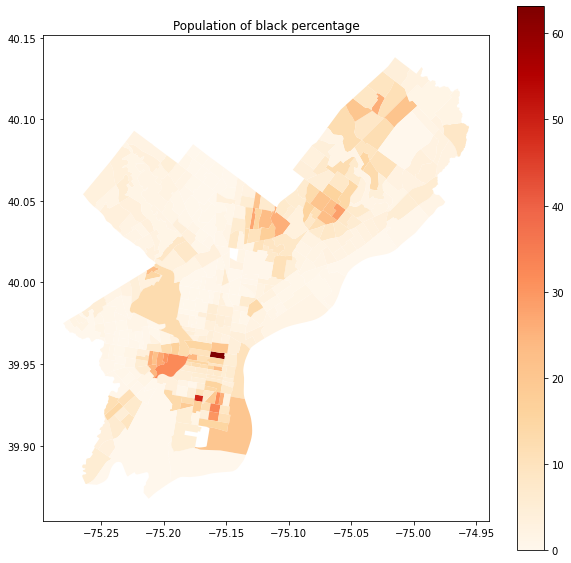

C:\Users\10539\AppData\Local\Temp/ipykernel_20672/2072061806.py:44: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  crime_count = gpd.sjoin(census, crime, predicate='contains').groupby(level=0).size().reset_index(name='count')


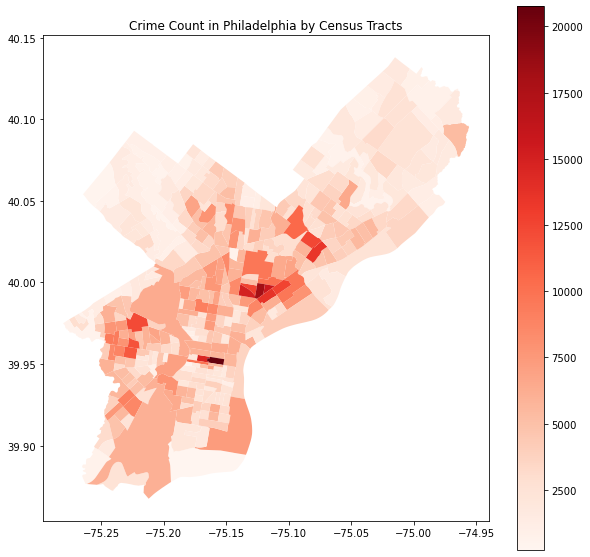

In [17]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
from utils import convert_to_lat, convert_to_long

philly_bbox = (-75.2803, 39.8718, -74.9558, 40.1376)

crash_general = pd.read_csv('../APAC_2023_Datasets/Crashes/crash_info_general.csv')
crash_general = crash_general[crash_general['LATITUDE'].notna() & crash_general['LONGITUDE'].notna()]
crash_general['LATITUDE'] = crash_general['LATITUDE'].apply(convert_to_lat)
crash_general['LONGITUDE'] = crash_general['LONGITUDE'].apply(convert_to_long)
crash_points = gpd.points_from_xy(crash_general.LONGITUDE, crash_general.LATITUDE)
crash_gdf = gpd.GeoDataFrame(geometry=crash_points)

# count the car crashes in each census tract
census = gpd.read_file('../Citadel-Datathon-yitao/Data/Census_Tracts_2010-shp/c16590ca-5adf-4332-aaec-9323b2fa7e7d2020328-1-1jurugw.pr6w.shp')
crash_counts = gpd.sjoin(census, crash_gdf, op='contains').groupby(level=0).size().reset_index(name='count')
# if census tract does not contain any crash, set the count to 0
crash_counts = crash_counts.set_index('index').reindex(range(len(census))).fillna(0).reset_index()
fig, ax = plt.subplots(figsize=(10,10))
census.plot(column=crash_counts['count'], cmap='Reds', legend=True, ax=ax)
ax.set_title('Car Crash Count in Philadelphia by Census Tracts')
plt.show()


# in each grid, extract the other features tha may be related to the crash count
# e.g. population, income, etc.
populations = pd.read_csv('../APAC_2023_Datasets/Traffic, Investigations _ Other/philadelphia_population_metrics.csv')
census['GEOID10'] = census['GEOID10'].apply(lambda x: int(x))
populations = populations.merge(census[['GEOID10', 'geometry']], how='left', left_on='GEOGRAPHY_NAME', right_on='GEOID10')
populations = gpd.GeoDataFrame(populations)
fig6, ax = plt.subplots(figsize=(10,10))
populations.plot(column='PERCENT_ASIAN_NH', cmap='OrRd', legend=True, ax=ax)
ax.set_title('Population of black percentage')
plt.show()


crime = pd.read_csv('../APAC_2023_Datasets/Traffic, Investigations _ Other/crimes.csv')
crime = gpd.GeoDataFrame(crime, geometry=gpd.points_from_xy(crime.lng, crime.lat))
crime_count = gpd.sjoin(census, crime, predicate='contains').groupby(level=0).size().reset_index(name='count')
crime_count = crime_count.set_index('index').reindex(range(len(census))).fillna(0).reset_index()
fig7, ax = plt.subplots(figsize=(10,10))
census.plot(column=crime_count['count'], cmap='Reds', legend=True, ax=ax)
ax.set_title('Crime Count in Philadelphia by Census Tracts')
plt.show()

# now we have car crash count, population, crime count in each census tract
# we can use these featrues to train a model to predict the car crash count in each census tract
# merge the features into one geodataframe

data = gpd.GeoDataFrame(geometry=census['geometry'])
data['crash_count'] = crash_counts['count']
data['crime'] = crime_count['count'] # normalize count
data['crime'] = data['crime'] / data['crime'].max()
data['black_percentage'] = populations['PERCENT_BLACK_NH']
data['asian_percentage'] = populations['PERCENT_ASIAN_NH']
data['hispanic_percentage'] = populations['PERCENT_HISPANIC']

y = np.log(data['crash_count'].values)
X = data.drop(['crash_count', 'geometry'], axis=1).values



In [10]:
Data_general = pd.read_csv('../APAC_2023_Datasets/Crashes/crash_info_general.csv')
Data_flag = pd.read_csv('../APAC_2023_Datasets/Crashes/crash_info_flag_variables.csv')

regdata_flag = Data_flag[['CRN','DRIVER_16YR','DRIVER_17YR','DRIVER_18YR','DRIVER_19YR',\
                          'DRIVER_20YR','DRIVER_50_64YR','DRIVER_65_74YR',\
                            'DRIVER_75PLUS','MATURE_DRIVER','UNSIGNALIZED_INT',\
                            'DRINKING_DRIVER','DRUGGED_DRIVER','ALCOHOL_RELATED','DRUG_RELATED',\
                              'MOTORCYCLE','SPEEDING','IMPAIRED_DRIVER']]
Data_general.columns.values
regdata = Data_general[['LATITUDE','LONGITUDE','CRN','fips','ROAD_CONDITION','MAX_SEVERITY_LEVEL','COLLISION_TYPE']]
xy = pd.merge(regdata,regdata_flag,on='CRN',how='inner')
xy['fatal'] = xy['MAX_SEVERITY_LEVEL'].apply(lambda x: 1 if (x in [1,2]) else 0)
xy['pedestrian'] = xy['COLLISION_TYPE'].apply(lambda x: 1 if x==8 else 0)
xy['drinking others'] = xy['ALCOHOL_RELATED'] - xy['DRINKING_DRIVER']
xy['drinking others'] = xy['drinking others'].apply(lambda x: 1 if x==1 else 0)

xy['drug others'] = xy['DRUG_RELATED'] - xy['DRUGGED_DRIVER']
xy['drug others'] = xy['drug others'].apply(lambda x: 1 if x==1 else 0)
xy = xy[xy['IMPAIRED_DRIVER'] == 1]

C:\Users\10539\AppData\Local\Temp/ipykernel_20672/1246460688.py:1: DtypeWarning: Columns (97,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  Data_general = pd.read_csv('../APAC_2023_Datasets/Crashes/crash_info_general.csv')


In [11]:
xy

,LATITUDE,LONGITUDE,CRN,fips,ROAD_CONDITION,MAX_SEVERITY_LEVEL,COLLISION_TYPE,DRIVER_16YR,DRIVER_17YR,DRIVER_18YR,...,DRUGGED_DRIVER,ALCOHOL_RELATED,DRUG_RELATED,MOTORCYCLE,SPEEDING,IMPAIRED_DRIVER,fatal,pedestrian,drinking others,drug others
43,39 57:36.110,75 10:47.897,2010008992,4.210198e+11,1,4,7,0,0,0,...,0,1,0,0,0,1,0,0,0,0
56,NaN,NaN,2010010198,NaN,1,0,7,0,0,0,...,1,0,1,0,0,1,0,0,0,0
57,39 59:16.480,75 15:17.667,2010010260,4.209121e+11,1,8,7,0,0,0,...,1,0,1,0,0,1,0,0,0,0
60,39 55:56.866,75 12:00.062,2010010428,4.210198e+11,1,0,7,0,0,0,...,0,1,0,0,0,1,0,0,0,0
70,40 04:23.595,75 11:21.776,2010011506,4.210103e+11,1,0,7,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132916,39 57:37.781,75 10:52.742,2022009945,4.210198e+11,9,1,0,0,0,0,...,0,1,0,1,0,1,1,0,0,0
132920,40 00:36.514,75 08:10.442,2022010813,4.210104e+11,1,1,8,0,0,0,...,1,1,1,0,0,1,1,1,0,0
132962,39 57:31.481,75 09:44.105,2022014502,4.210101e+11,1,0,1,0,0,0,...,1,0,1,0,0,1,0,0,0,0
132963,39 56:55.950,75 13:01.490,2022014503,4.210101e+11,1,0,5,0,0,0,...,1,1,1,0,0,1,0,0,0,0


In [18]:
impair = xy[xy['LONGITUDE'].notna() & xy['LATITUDE'].notna()]
impair.LONGITUDE = impair.LONGITUDE.apply(convert_to_long)
impair.LATITUDE = impair.LATITUDE.apply(convert_to_lat)

C:\Users\10539\AppData\Local\Temp/ipykernel_20672/695383255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impair.LONGITUDE = impair.LONGITUDE.apply(convert_to_long)
C:\Users\10539\AppData\Local\Temp/ipykernel_20672/695383255.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impair.LATITUDE = impair.LATITUDE.apply(convert_to_lat)


In [14]:
impair  = gpd.GeoDataFrame(impair, geometry=gpd.points_from_xy(impair.LONGITUDE, impair.LATITUDE)).set_crs(epsg=4326)
impair = impair.to_crs(grid.crs)
impair = gpd.sjoin(impair, grid, how='left', predicate='within').groupby('index_right').size().reset_index(name='count')
impair = impair.set_index('index_right').reindex(range(len(grid))).fillna(0).reset_index()
grid['impair'] = impair['count']

In [23]:
impair_c

,index,count
0,0,11.0
1,1,16.0
2,2,19.0
3,3,5.0
4,4,7.0
...,...,...
379,379,40.0
380,380,138.0
381,381,39.0
382,382,161.0


C:\Users\10539\AppData\Local\Temp/ipykernel_20672/2338996982.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  impair_c = gpd.sjoin(census, impair_c, predicate='contains').groupby(level=0).size().reset_index(name='count')


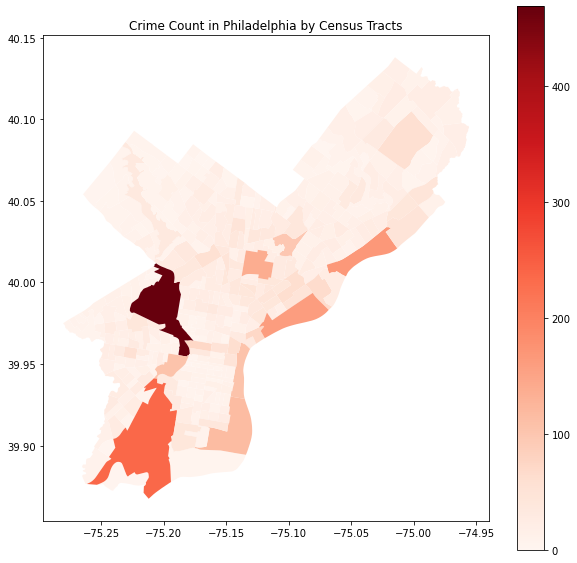

In [21]:
# census
impair_c  = gpd.GeoDataFrame(impair, geometry=gpd.points_from_xy(impair.LONGITUDE, impair.LATITUDE))
impair_c = gpd.sjoin(census, impair_c, predicate='contains').groupby(level=0).size().reset_index(name='count')
impair_c = impair_c.set_index('index').reindex(range(len(census))).fillna(0).reset_index()
fig7, ax = plt.subplots(figsize=(10,10))
census.plot(column=impair_c['count'], cmap='Reds', legend=True, ax=ax)
ax.set_title('Crime Count in Philadelphia by Census Tracts')
plt.show()

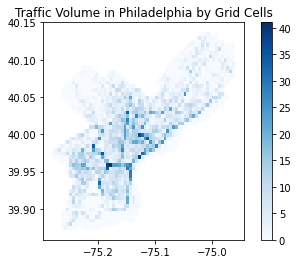

In [15]:
grid.plot(column='impair', cmap='Blues', legend=True)
plt.title('Impaired driver in Philadelphia by Grid Cells')
plt.show()

## 对flag数据的分析

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
from pymining import itemmining
import sys
sys.path.append('C:\\Users\\10539\\Desktop\\Datathon')

In [3]:
Data_flag = pd.read_csv('../APAC_2023_Datasets/Crashes/crash_info_flag_variables.csv')

In [6]:
Data_flag = Data_flag.drop(['CRN'],axis=1)

In [20]:
len(Data_flag)

133013

In [7]:
Data_counts = Data_flag.sum(axis=0)

In [28]:
Data_counts[Data_counts>50000]

AGGRESSIVE_DRIVING     65329.0
INJURY                 94709.0
INJURY_OR_FATAL        95497.0
INTERSECTION           67880.0
LOCAL_ROAD             79755.0
MULTIPLE_VEHICLE       93303.0
NON_INTERSECTION       65133.0
STATE_ROAD             83454.0
URBAN                 133013.0
VEHICLE_TOWED          91499.0
dtype: float64

In [19]:
len(Data_flag.columns

110

<AxesSubplot:>

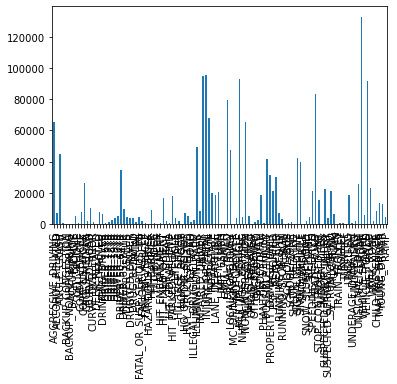

In [9]:
Data_counts.plot(kind='bar')